<a href="https://colab.research.google.com/github/LuvMutreja/Hotel-booking-analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

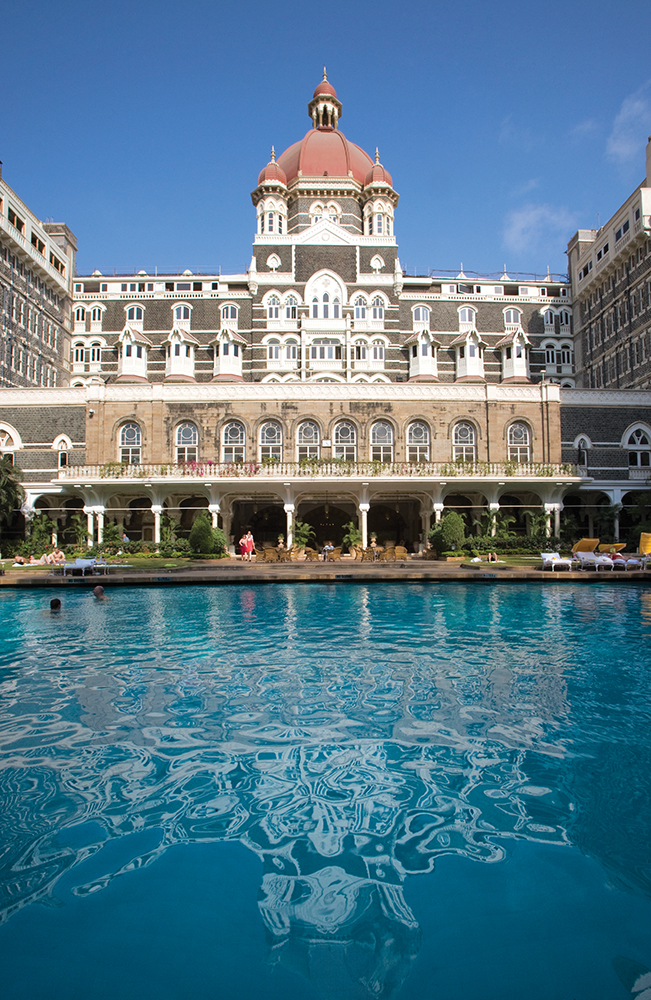

In [1]:
#importing the necessary libraries for analysing the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date

In [2]:
#connecting my drive to google colaboratory
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#accessing/reading the hotel booking dataset
hoteldf1=pd.read_csv('/content/drive/MyDrive/Alma Better/Module1 Python/Capstone Project/Copy of Hotel Bookings.csv')

In [4]:
#printing the dataframe
hoteldf1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [5]:
#studying the dataframe's observations, variables and their datatypes
hoteldf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

After loading the dataset we can see a number of things. These 32 columns provide a very rich amount of information for deep data exploration we can do on this dataset. We can also see some missing values, which will require cleaning and handling of NaN values. 

# **Description of Columns**

### **Understanding, Wrangling and Cleaning Data**

Presenting the code and methods for acquiring the data. Loading the data into appropriate format for analysis.Side by side, explaining the process and results

**After** looking at the dataset we were able to notice some NaN values, therefore we need to examine missing values further before continuing with analysis


In [6]:
#finding out first which columns have null values
#using 'sum' function will show us how many nulls are found in each column of the dataset
hoteldf1.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In this dataset, there are not too many columns with null(NaN) values, as we can see that children column has only 4 null values which we can replace with 0 because it's quite natural that those people didn't bring any child with them. And we can also see that country, agent and company have null values but these columns can not be dropped as we need these columns for our analysis. Instead, the null countries can be replaced with a string 'unknown'.      

In [7]:
#replacing the null values in children column with 0
hoteldf1.fillna({'children':0},inplace=True)

In [8]:
#replacing null countries with 'unknown'
hoteldf1.fillna({'country':'unknown'},inplace=True)

In [9]:
#checking again for null values
hoteldf1.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Now only agent and company columns are left which have null values, which will be dealt with later. 

**There** is a column on 1st index whose name is is_canceled which has only 2 values 0 meaning the booking is not cancelled and 1 meaning the booking is cancelled.  

In [10]:
#checking how many bookings are cancelled and how many are not cancelled
hoteldf1['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

As we can see that 44224 bookings are cancelled, so we will not be using these 44224 rows for our analysis. Only not cancelled rows will be used for analysis.  

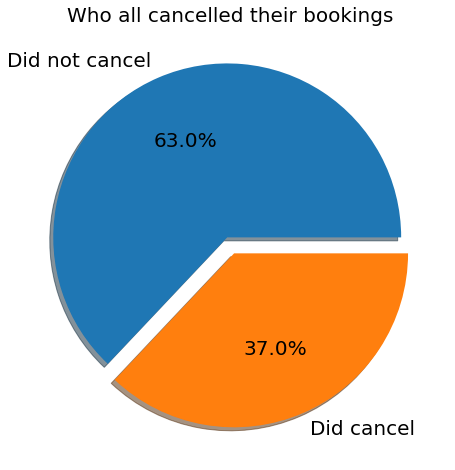

In [11]:
#showing cancelled and not cancelled bookings through a piechart
hoteldf1['is_canceled'].value_counts().rename({0:'Did not cancel',1:'Did cancel'}).plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)
plt.title('Who all cancelled their bookings',fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.show()

As our data cleaning comes to an end we will only be working on those rows where bookings are not cancelled and country is not unknown.

In [12]:
#obtaining a new dataframe which has cleaned data
hoteldf=hoteldf1[(hoteldf1['is_canceled']==0) & (hoteldf1['country'] != 'unknown')]  

In [13]:
#checking the dataframe before starting analysis
hoteldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74745 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           74745 non-null  object 
 1   is_canceled                     74745 non-null  int64  
 2   lead_time                       74745 non-null  int64  
 3   arrival_date_year               74745 non-null  int64  
 4   arrival_date_month              74745 non-null  object 
 5   arrival_date_week_number        74745 non-null  int64  
 6   arrival_date_day_of_month       74745 non-null  int64  
 7   stays_in_weekend_nights         74745 non-null  int64  
 8   stays_in_week_nights            74745 non-null  int64  
 9   adults                          74745 non-null  int64  
 10  children                        74745 non-null  float64
 11  babies                          74745 non-null  int64  
 12  meal                           

In [14]:
#also checking the 'is_canceled' column
hoteldf['is_canceled'].value_counts()

0    74745
Name: is_canceled, dtype: int64

The data is now cleaned and we can start with our analysis

# **What is the best time of year to book a hotel room ?**


### **This question has two aspects-**

i) From customer's point of view- 

From customers point of view the best time to book a hotel room is when it is the cheapest i.e during off seasons, when not too many people book hotel rooms.

ii)From hotel's point of view-

From hotel's point of view the best time to book the hotel is during onn seasons i.e when too many people are booking rooms and the demand for rooms is high, at that time the hotel can charge high prices from customers, beacause the supply is same but the demand is relatively high.  

In [15]:
#making a new column for month number
def month_number(month):
  if month=='January':
    return 1
  elif month=='February':
    return 2
  elif month=='March':
    return 3
  elif month=='April':
    return 4
  elif month=='May':
    return 5
  elif month=='June':
    return 6
  elif month=='July':
    return 7
  elif month=='August':
    return 8         
  elif month=='September':
    return 9
  elif month=='October':
    return 10
  elif month=='November':
    return 11     
  else:
    return 12  
hoteldf['month_number']=hoteldf['arrival_date_month'].apply(month_number)        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [16]:
#getting per month hotel bookings for each year
per_month_booking_for_each_year=hoteldf.groupby('arrival_date_year')['month_number'].value_counts().unstack().fillna(0)

In [17]:
#viewing per month booking for each year
per_month_booking_for_each_year

month_number,1,2,3,4,5,6,7,8,9,10,11,12
arrival_date_year,,,,,,,,,,,,
2015,0.0,0.0,0.0,0.0,0.0,0.0,1504.0,2279.0,3006.0,3203.0,1834.0,1927.0
2016,1658.0,2521.0,3312.0,3345.0,3551.0,3185.0,3059.0,3230.0,3361.0,3664.0,2798.0,2438.0
2017,2410.0,2796.0,3279.0,3188.0,3551.0,3208.0,3329.0,3109.0,0.0,0.0,0.0,0.0


In [18]:
#storing the 2015 bookings in 2015's dataset
bookings_in2015=per_month_booking_for_each_year.iloc[0]

In [19]:
#viewing 2015's dataset
bookings_in2015

month_number
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7     1504.0
8     2279.0
9     3006.0
10    3203.0
11    1834.0
12    1927.0
Name: 2015, dtype: float64

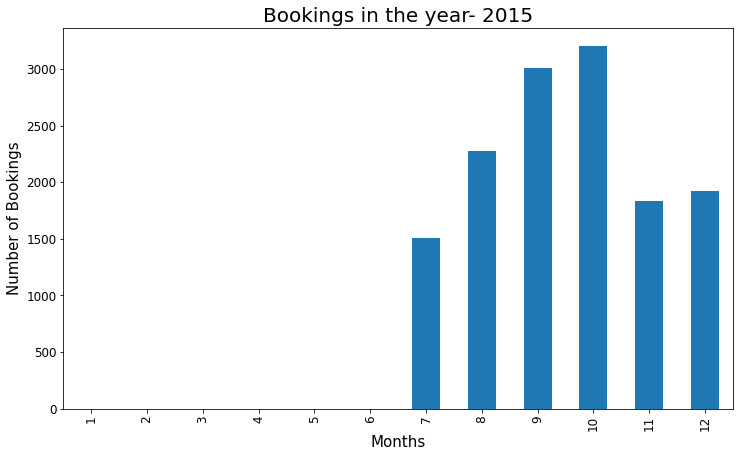

In [20]:
#plotting 2015's dataset on a bar graph
plt.figure(figsize=(12,7))
bookings_in2015.plot(kind='bar',fontsize=12)
plt.title('Bookings in the year- 2015',fontsize=20)
plt.xlabel('Months',fontsize=15)
plt.ylabel('Number of Bookings',fontsize=15)
plt.show()

### **Trends in 2015-**
As we can see in 2015 there are no bookings before July i.e 7th month.
So,

i)From customer's point of view- 

The best time to book hotel room in 2015 is before July because the rates for rooms before July will be very low compared to rates for rooms after July as the demand for roms before july is zero or very low, and we all know that demand and price are directly proportional to each other.

ii)From hotel's point of view-

The best time to book hotel room in 2015 is after July because the rates for rooms before July will be very low compared to rates for rooms after July as the demand for rooms before July is zero or very low, and we all know that demand and price are directly proportional to each other. Hence, hotels can charge hight prices from customers during the period when demand for rooms is high i.e after July.


In [21]:
#storing the 2016's bookings in 2016's dataset
bookings_in2016=per_month_booking_for_each_year.iloc[1]

In [22]:
#viewing 2016's dataset
bookings_in2016

month_number
1     1658.0
2     2521.0
3     3312.0
4     3345.0
5     3551.0
6     3185.0
7     3059.0
8     3230.0
9     3361.0
10    3664.0
11    2798.0
12    2438.0
Name: 2016, dtype: float64

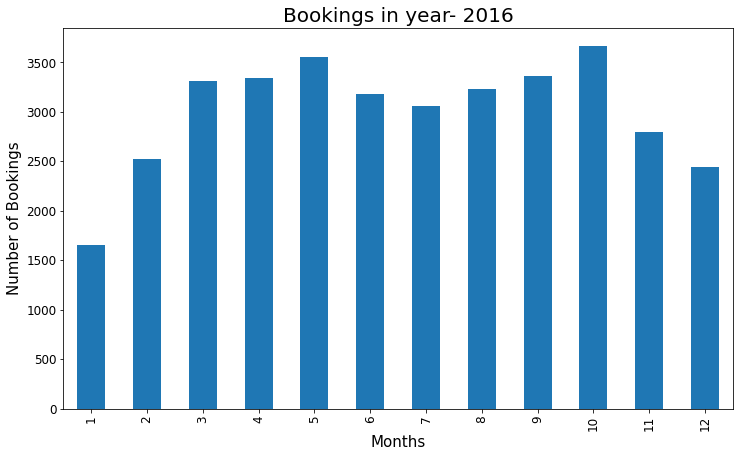

In [23]:
#plotting 2016's dataset on a bar graph
plt.figure(figsize=(12,7))
bookings_in2016.plot(kind='bar',fontsize=12)
plt.title('Bookings in year- 2016',fontsize=20)
plt.xlabel('Months',fontsize=15)
plt.ylabel('Number of Bookings',fontsize=15)
plt.show()

### **Trends in 2016-**
As we can see in 2016 there are bookings in every month. So,

i)From customer's point of view-

The best time to book hotel room in 2016 is during 1st two and last 2 months of the year because these months have the least number of bookings throughout the year. Hence, the price for rooms during these months will be less compared to other months.  

ii)From hotel's point of view- 

The best time to book hotel room in 2016 is during 3rd-10th month of the year because these months have the ggod amount of bookings. Hence, the hotel can charge reatively high price from customers during these months.  


In [24]:
#storing the 2017's bookings in 2017's dataset
bookings_in2017=per_month_booking_for_each_year.iloc[2]

In [25]:
#viewing 2017's dataset
bookings_in2017

month_number
1     2410.0
2     2796.0
3     3279.0
4     3188.0
5     3551.0
6     3208.0
7     3329.0
8     3109.0
9        0.0
10       0.0
11       0.0
12       0.0
Name: 2017, dtype: float64

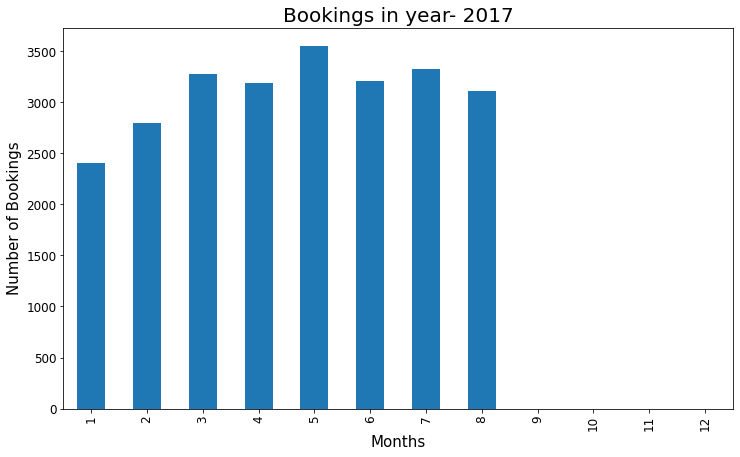

In [26]:
#plotting 2017's dataset on a bar graph
plt.figure(figsize=(12,7))
bookings_in2017.plot(kind='bar',fontsize=12)
plt.title('Bookings in year- 2017',fontsize=20)
plt.xlabel('Months',fontsize=15)
plt.ylabel('Number of Bookings',fontsize=15)
plt.show()

### **Trends in 2017-**
As we can see in 2017 there are no/less bookings after 8th month i.e August. So,

i)From customer's point of view-

The best time to book hotel room in 2017 is after August because there is not a single booking trafic after August compare to rest of the months of year 2017, which ultimately will give customer high probability to get discounted rates on hotel rooms.

ii)From hotel's point of view-

The best time to book hotel room in 2017 is till Month of August because till August, graph is denoting high amount of customer engagement which will enable the hotel to charge relatively high price from customers during this period.



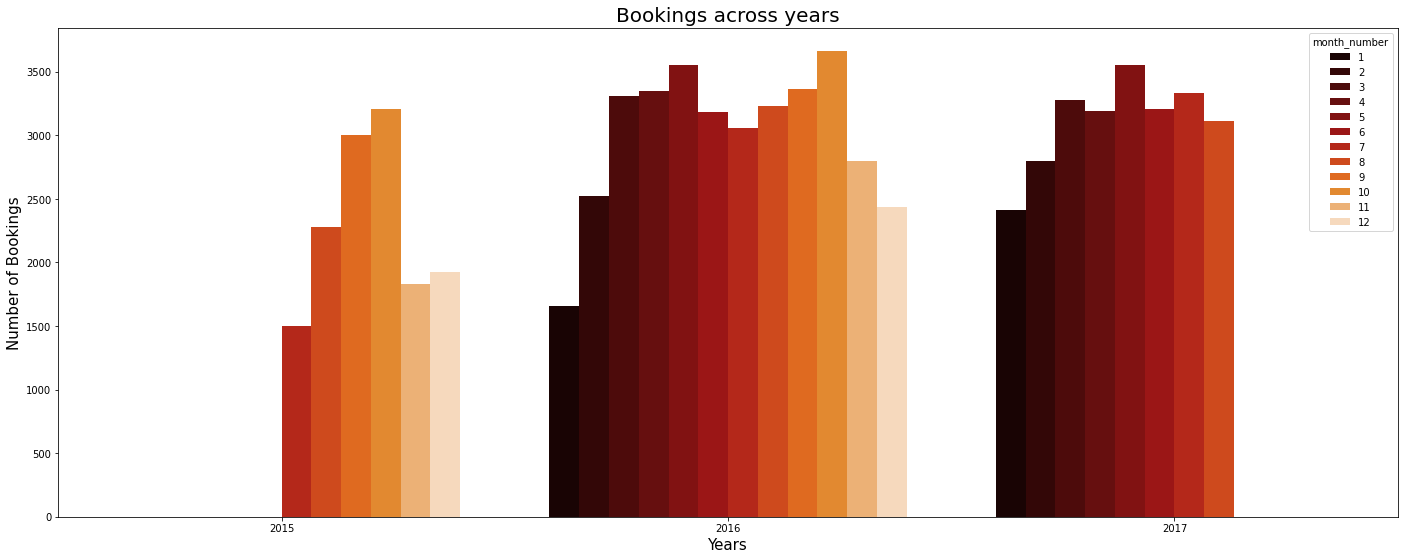

In [27]:
#plotting number of bookings across years
plt.figure(figsize=(24,9))
sns.countplot(x='arrival_date_year',data=hoteldf,hue='month_number',palette='gist_heat')
plt.title('Bookings across years',fontsize=20)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of Bookings',fontsize=15)
plt.show()

Most number of bookings were in the year 2016. And the busiest month for the last 2 years was 5th month i.e May.  

# **What is the optimal length of stay in order to get the best daily rate?**

In order to determine the length of stay for getting the best daily rate i.e lowest adr(average daily rate). We need to compare the total nights stayed and adr with each other.  

In [28]:
#calculating the total nights stayed by each customer
hoteldf['nights_stayed']= hoteldf['stays_in_weekend_nights'] + hoteldf['stays_in_week_nights']  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


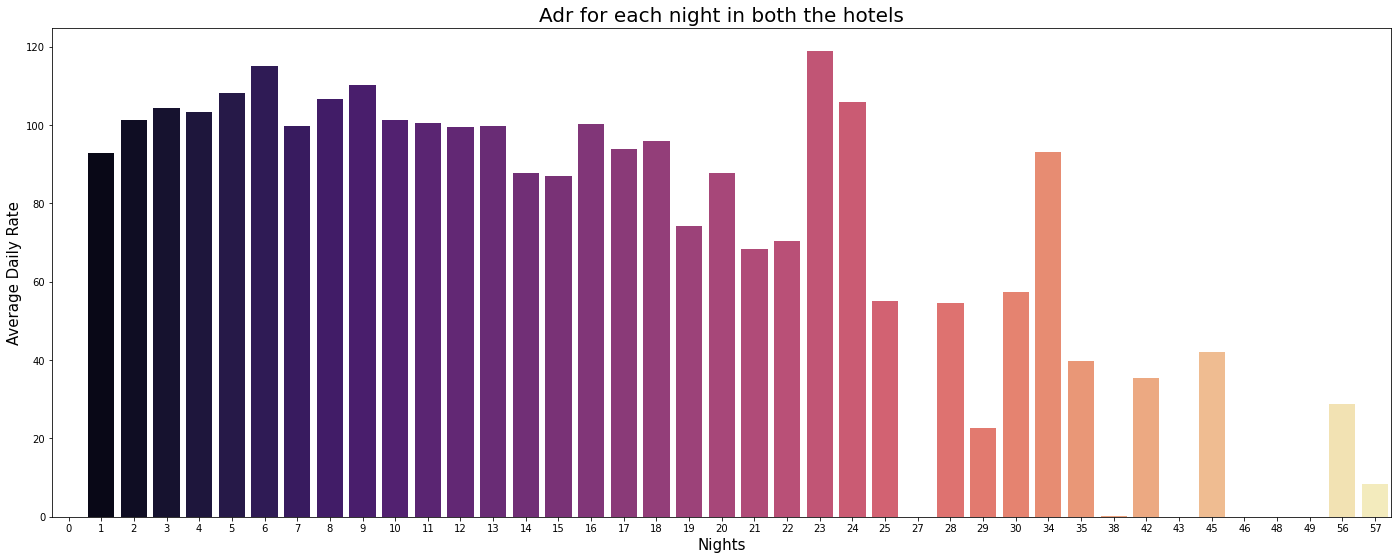

In [29]:
#comparing adr and nights stayed in order to get optimal length of stay
plt.figure(figsize=(24,9))
sns.barplot(x='nights_stayed',y='adr',data=hoteldf,ci=0.01,palette='magma')
plt.title('Adr for each night in both the hotels',fontsize=20)
plt.ylabel('Average Daily Rate',fontsize=15)
plt.xlabel('Nights',fontsize=15)
plt.show()

## **Observation:** 

For determining the optimal length of stay in order to get the best daily rate one should stay for 1 night or should have a plan to stay for a couple of nights. Because as per the above graph, if a customer stays for 7 nights he'll get a low daily rate. Also, we can say that the maximum night stays are directly proportional to the best daily rate (i.e. at a low price). You can see if the customer stayed for 15 nights, he/she will get the best daily rate compared to 7 nights. In the same manner, if the customer lasted for the 25th night he/she will get a better daily rate than the aforementioned night's duration.

### **Average Daily Rate year and month wise** 


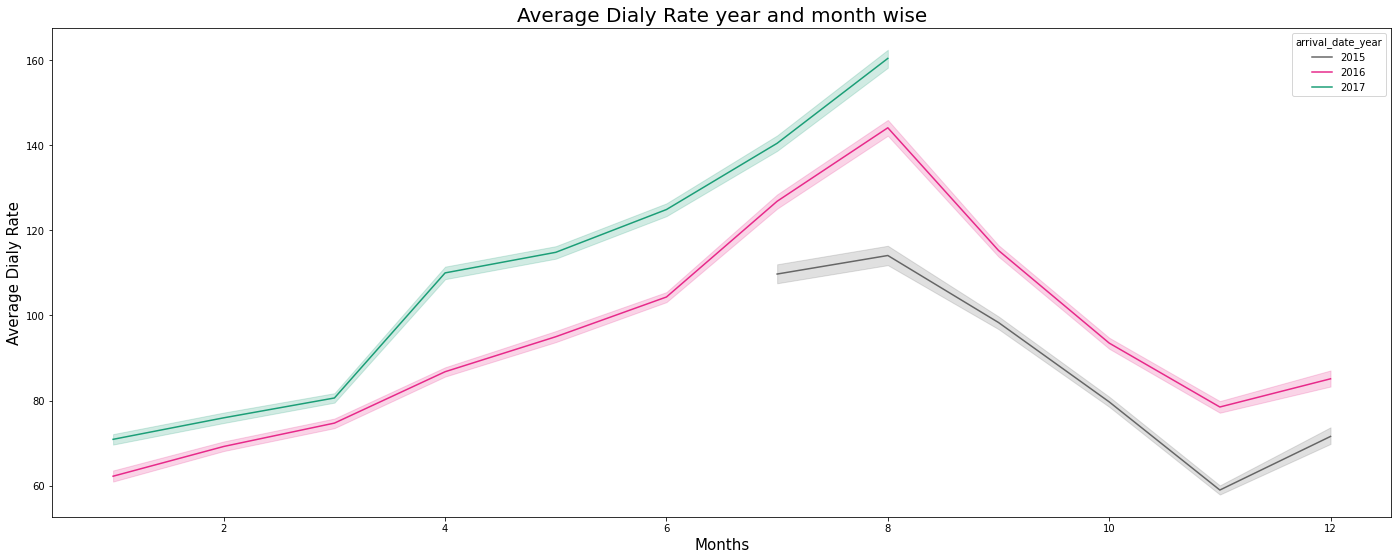

In [62]:
#Per day earning for each month and and year
plt.figure(figsize=(24,9))
sns.lineplot(x='month_number',y='adr',data=hoteldf,hue='arrival_date_year',palette='Dark2_r')
plt.xlabel('Months',fontsize=15)
plt.ylabel('Average Dialy Rate',fontsize=15)
plt.title('Average Dialy Rate year and month wise',fontsize=20)
plt.show()

## **Observation:**
As we already know that in the year 2015 and 2017 booking traffic was not present for the complete year, despite this fact the per day earnings for hotel was maximum in the year 2017. The hotels are on the right track mentioning the fact that in 2016 per day earning was more than previous year and in 2017 the hotels have shown a massive per day revenue despite the fact that in 2017 bookings were only made for some months.

# **How to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?**

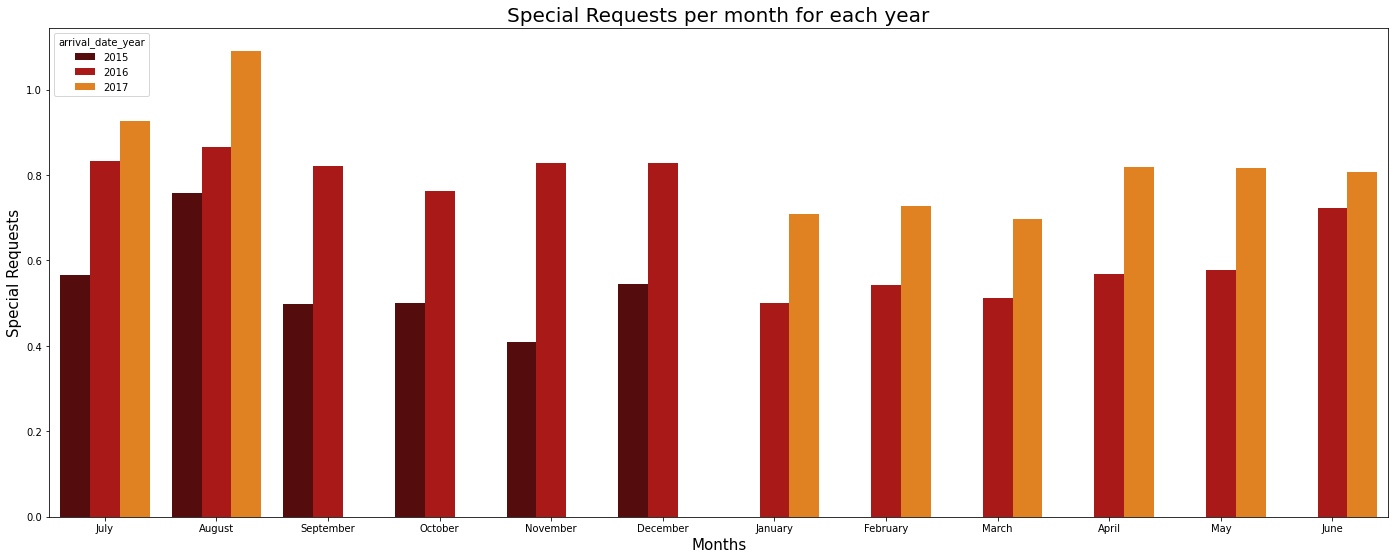

In [31]:
#
plt.figure(figsize=(24,9))
sns.barplot(x='arrival_date_month',y='total_of_special_requests',data=hoteldf,hue='arrival_date_year',palette='gist_heat',ci=0.01)
plt.xlabel('Months',fontsize=15)
plt.ylabel('Special Requests',fontsize=15)
plt.title('Special Requests per month for each year',fontsize=20)
plt.show()

## **Observation:** 
In the Month of July and August Hotels are getting high amount of Special Requests from Customers. Further we can also see that customers are constantly making spacial request in the month of April, May and June in the year of 2017.
Hence, it can be insighted that hotels are likely to receive a proportionately high number of special requests in the month of July and August in the upcoming year.

# **Which hotel to choose city or resort?**
Lets see which is more pocket friendly hotel resort or city!

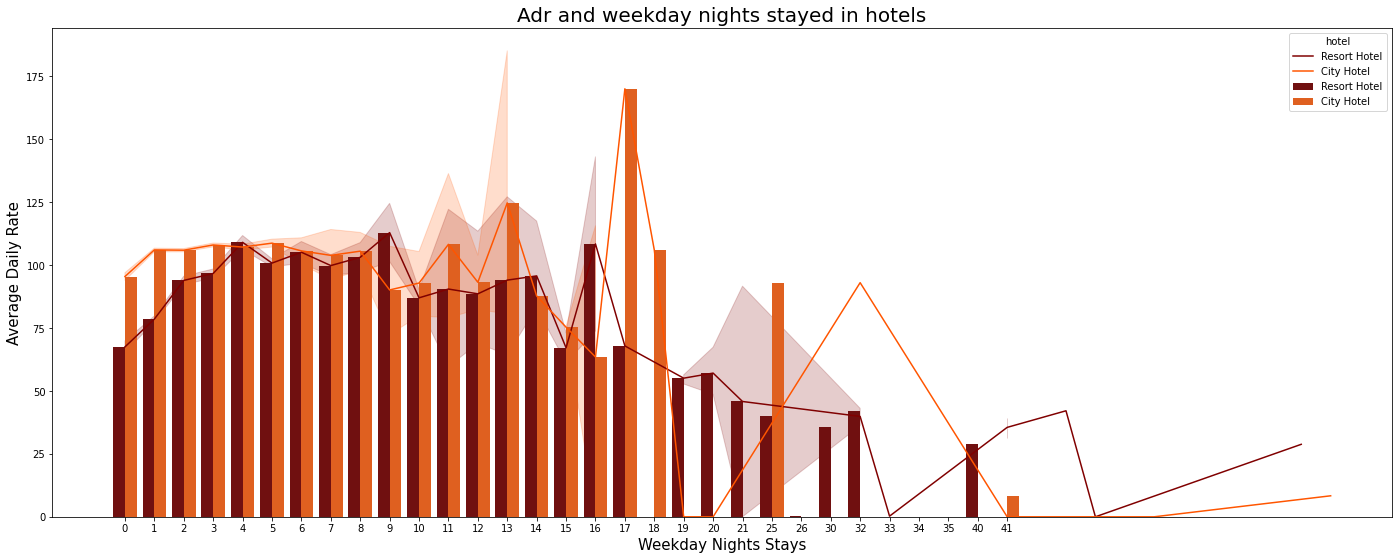

In [64]:
#adr and weekday stays in hotels
plt.figure(figsize=(24,9))
sns.barplot(x='stays_in_week_nights',y='adr',data=hoteldf,hue='hotel',ci=0.01,palette='gist_heat')
sns.lineplot(x='stays_in_week_nights',y='adr',data=hoteldf,hue='hotel',palette='gist_heat')
plt.xlabel('Weekday Nights Stays',fontsize=15)
plt.ylabel('Average Daily Rate',fontsize=15)
plt.title('Adr and weekday nights stayed in hotels',fontsize=20)
plt.show()

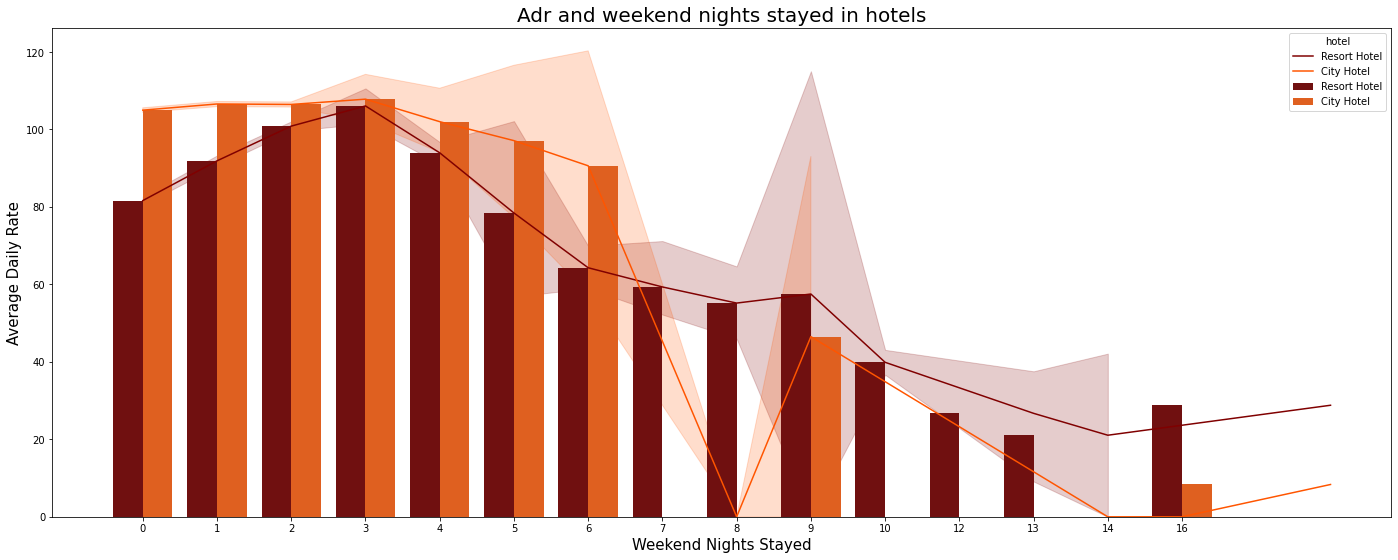

In [33]:
#adr and weekend stays in hotels
plt.figure(figsize=(24,9))
sns.barplot(x='stays_in_weekend_nights',y='adr',data=hoteldf,hue='hotel',ci=0.01,palette='gist_heat')
sns.lineplot(x='stays_in_weekend_nights',y='adr',data=hoteldf,hue='hotel',palette='gist_heat')

plt.title('Adr and weekend nights stayed in hotels',fontsize=20)
plt.xlabel('Weekend Nights Stayed',fontsize=15)
plt.ylabel('Average Daily Rate',fontsize=15)
plt.show()

## **Observation -**
 From the above graph we can infer that, If a customer wants affordable stay then they can choose Resort Hotels over City Hotels because in both the graphic representations we can see that Resort Hotel is offering less price than City Hotel.

# **Loyality Check**
Checking if a customer is a repeated guest or not i.e loyal customer or not. 

This can checked using the 'is_repeated_guest' column.  

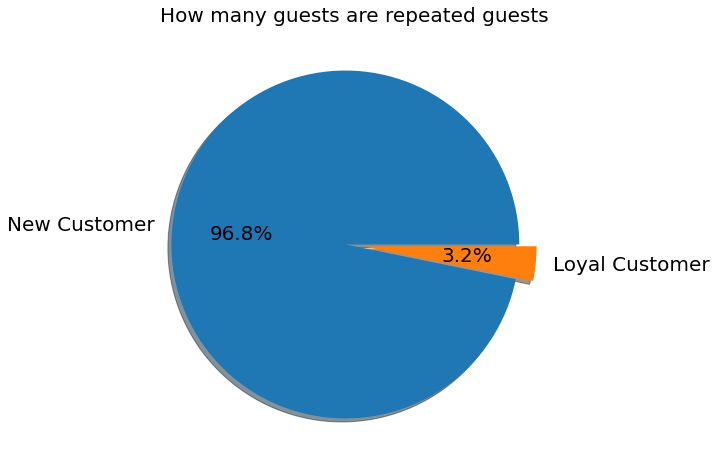

In [34]:
#checking how many guests are loyal
hoteldf1['is_repeated_guest'].value_counts().rename({0:'New Customer',1:'Loyal Customer'}).plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)
plt.title('How many guests are repeated guests',fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.show()

# **How many people got their desired room**
This can be showcased using two columns i.e 'reserved_room_type' and 'assigned_room_type'. The logic used to get this information will be,
if 'reserved_room_type' is equal to 'assigned_room_type' then it means that the customer is given the room he wanted else not. 

In [35]:
#viewing the values in reserved room type column
hoteldf['reserved_room_type'].value_counts()

A    52022
D    13072
E     4588
F     2010
G     1320
B      750
C      623
H      356
L        4
Name: reserved_room_type, dtype: int64

In [36]:
#obtaining how many people were assigned the room they wanted by creating a function and then applying it to the dataframe by  creating a new column
def got_desired_room(a,b):
  if a==b:
    return 'Yes'
  else:
      return 'No'
hoteldf['got_desired_room']=hoteldf.apply(lambda x1:got_desired_room(x1['reserved_room_type'],x1['assigned_room_type']),axis=1)      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [37]:
#viewing the new column
hoteldf['got_desired_room'].value_counts()

Yes    60839
No     13906
Name: got_desired_room, dtype: int64

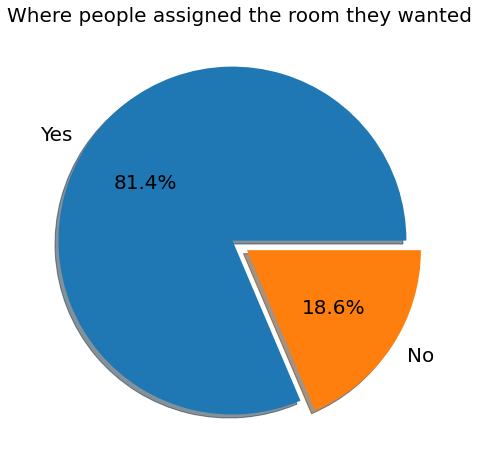

In [38]:
#checking how many people got the room they wanted
hoteldf['got_desired_room'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)
plt.title('Where people assigned the room they wanted',fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.show()

# **Determining the price for each customer**
The price for each customer is not given to us in the dataframe, therefore we are calculating it by multiplying nights stayed with average daily rate. Once we obtain the price for each customer then we can do analysis using the price column.  

In [39]:
#obtaining price by multiplying nights satayed in hotel and average daily rate(adr)
def price(a,b):
  return a*b
hoteldf['price']=hoteldf.apply(lambda x1:price(x1['adr'],x1['nights_stayed']),axis=1)  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [40]:
#viewing top 15 rows of 3 columns
hoteldf[['price','adr','nights_stayed']].head(15)

,price,adr,nights_stayed
0,0.00,0.00,0
1,0.00,0.00,0
2,75.00,75.00,1
3,75.00,75.00,1
4,196.00,98.00,2
5,196.00,98.00,2
6,214.00,107.00,2
7,206.00,103.00,2
11,580.00,145.00,4
12,388.00,97.00,4


# **Revenue earned by hotels for each year**
The price which customers pay is the revenue generated by hotels 

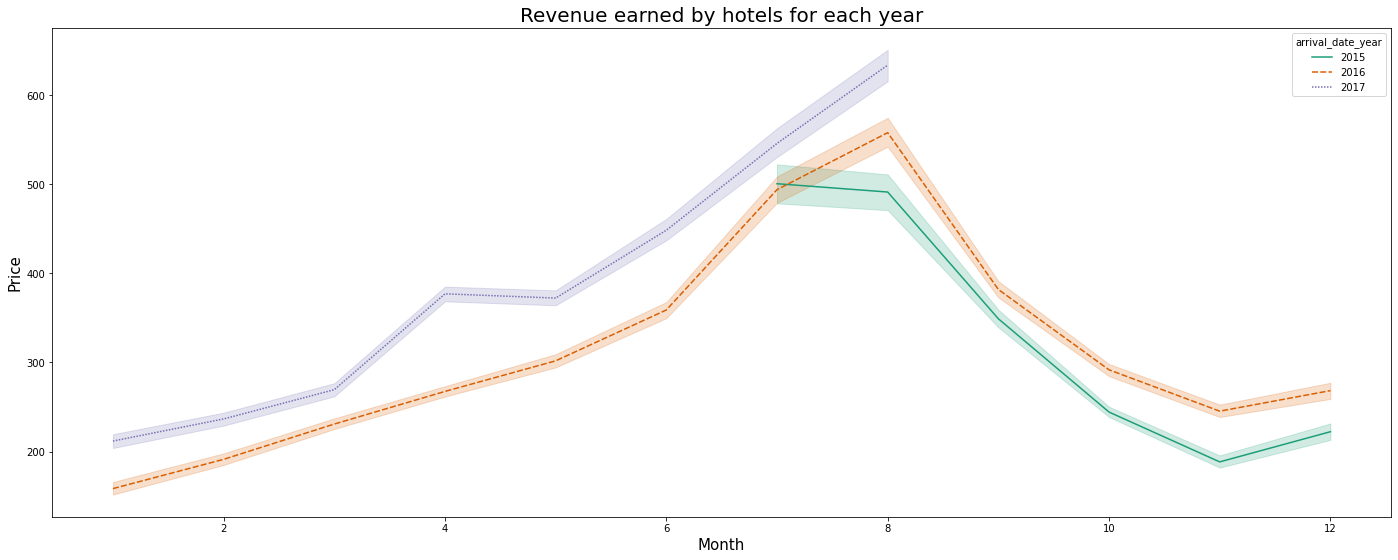

In [41]:
#viewing the revenue across years
plt.figure(figsize=(24,9))
sns.lineplot(x='month_number',y='price',data=hoteldf,hue='arrival_date_year',style='arrival_date_year',palette='Dark2')
plt.title('Revenue earned by hotels for each year',fontsize=20)
plt.xlabel('Month',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

## **Observation:**
As we already know that in the year 2015 and 2017 booking traffic was not present for the complete year, despite this fact the revenue for hotel was maximum in the year 2017. The hotels are on the right track mentioning the fact that in 2016 revenue was more than previous year and in 2017 the hotels have shown massive revenue earnings despite the fact that in 2017 bookings were only made for some months.


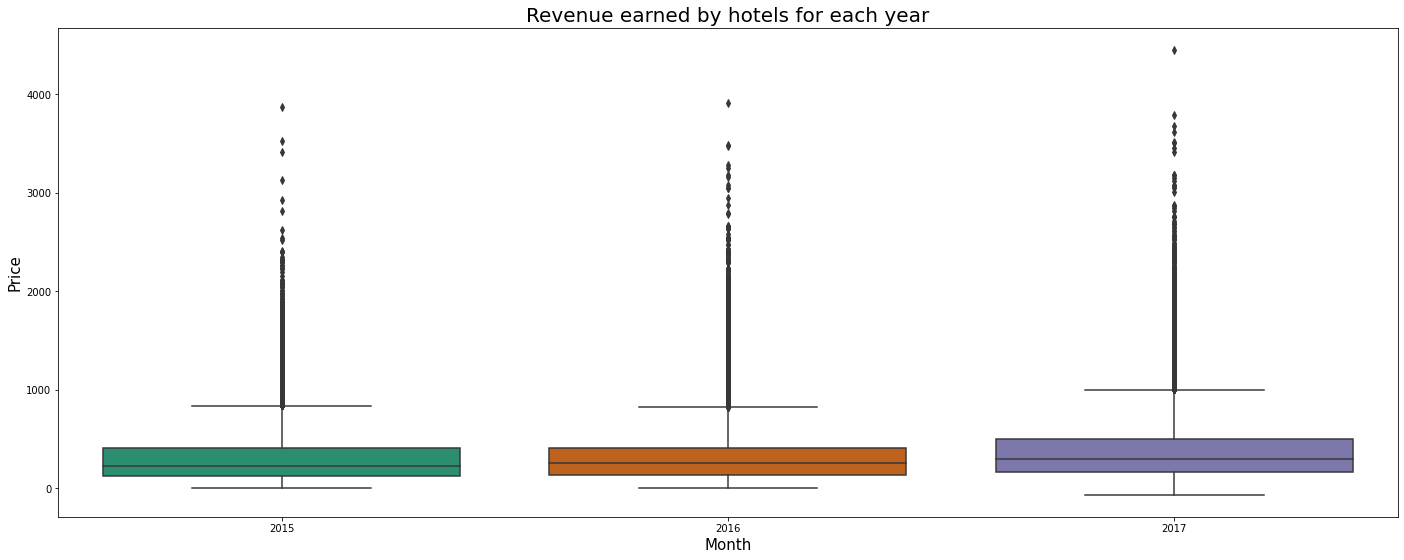

In [67]:
#same thing as above presented through boxplot
plt.figure(figsize=(24,9))
sns.boxplot(x='arrival_date_year',y='price',data=hoteldf,palette='Dark2')
plt.title('Revenue earned by hotels for each year',fontsize=20)
plt.xlabel('Month',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

# **From which customer's type did hotels earned the most revenue?**
For this we need to compare 2 things-

i) Adr and Customer type 

ii) Price and Customer type

### **Adr for each customer's type across years**

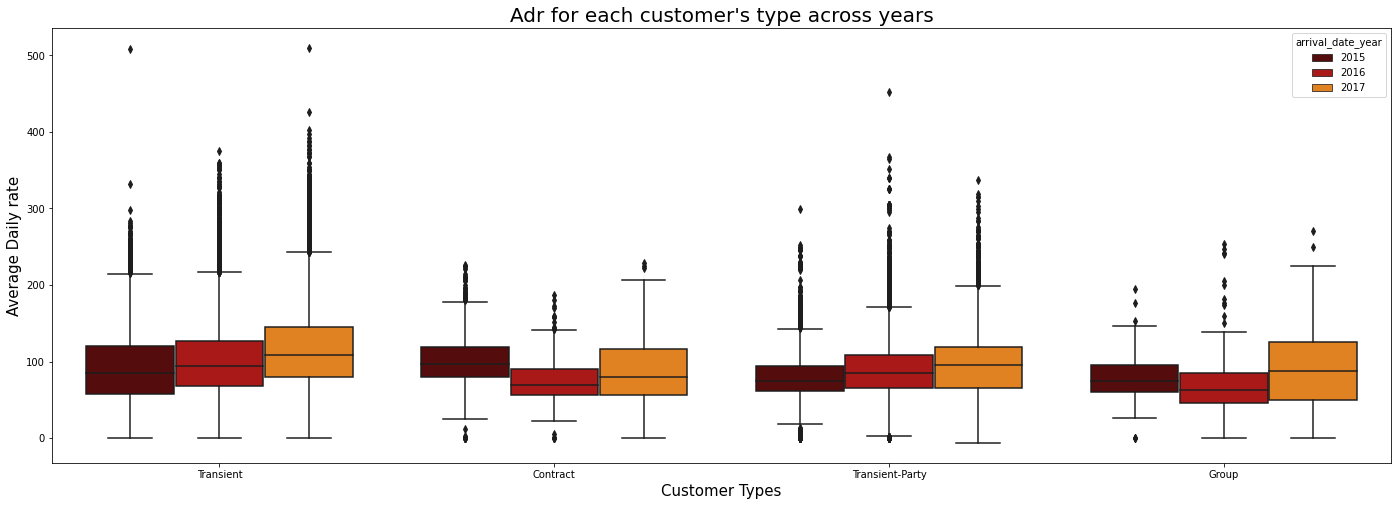

In [42]:
#from this we will get to know which customer's type paid highest daily rate
plt.figure(figsize=(24,8))
sns.boxplot(x='customer_type',y='adr',data=hoteldf,hue='arrival_date_year',palette='gist_heat')
plt.title("Adr for each customer's type across years", fontsize=20)
plt.xlabel('Customer Types',fontsize=15)
plt.ylabel('Average Daily rate',fontsize=15)
plt.show()

### **Price for each customer's type across years**

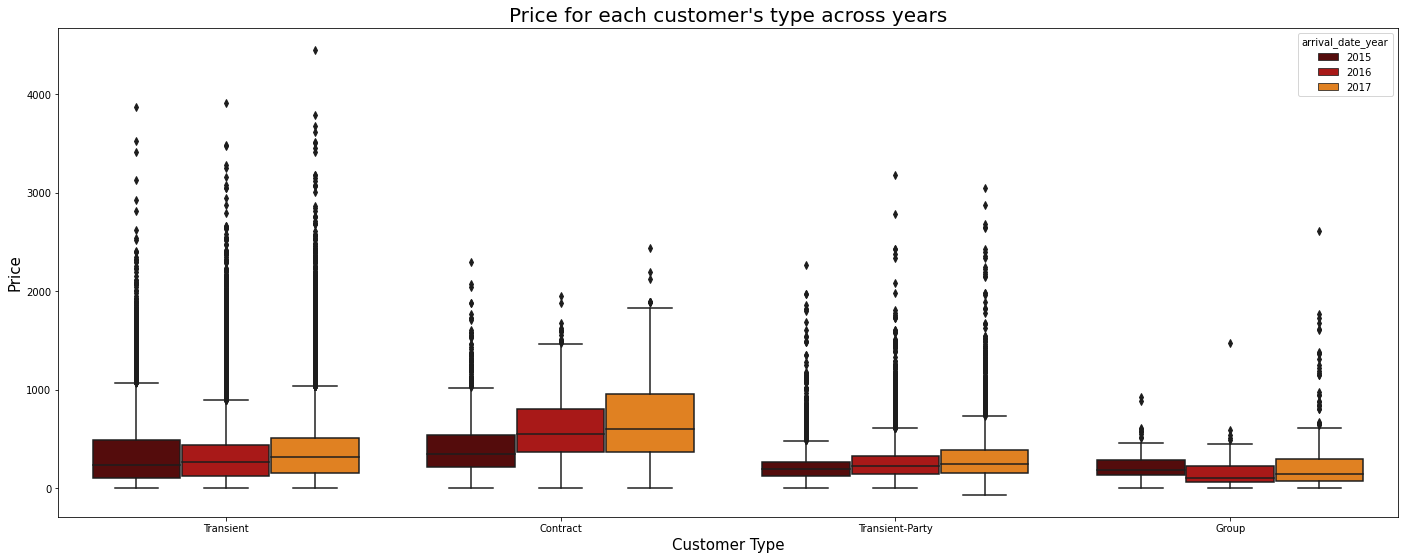

In [43]:
#from this we will get to know from which customer's type hotels earned the most 
plt.figure(figsize=(24,9))
sns.boxplot(x='customer_type',y='price',data=hoteldf,hue='arrival_date_year',palette='gist_heat')
plt.title("Price for each customer's type across years", fontsize=20)
plt.xlabel('Customer Type',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

# **Car parking Spaces required in hotels**

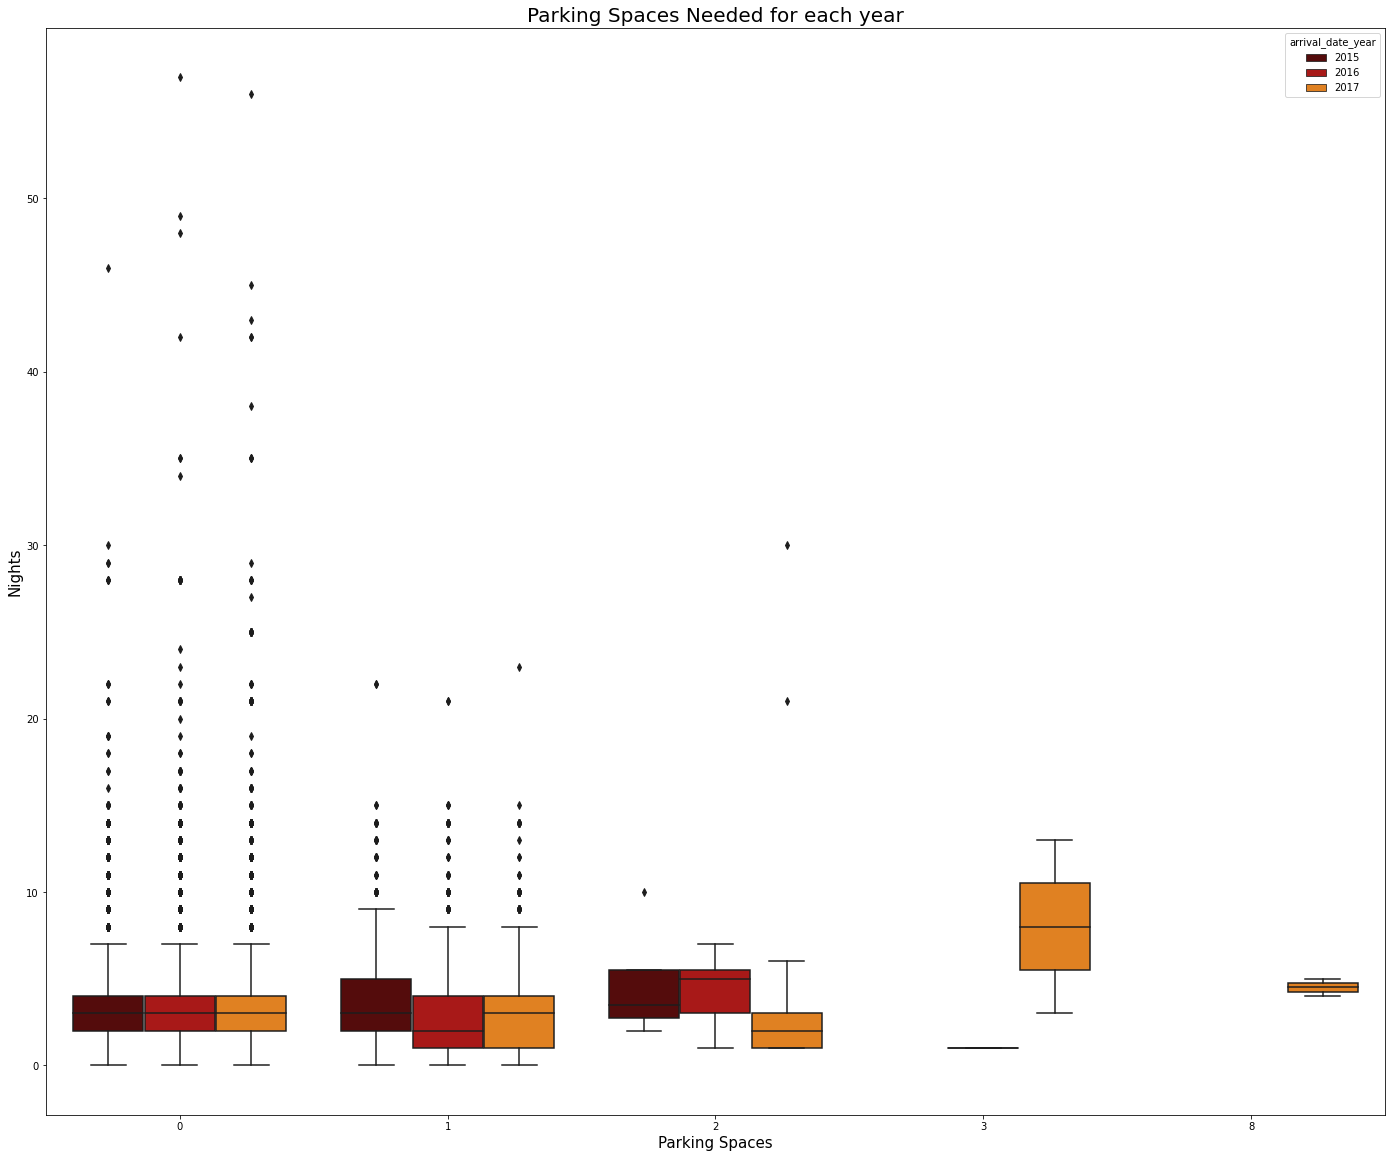

In [44]:
#viewing parking spaces reuired for each year
plt.figure(figsize=(24,20))
sns.boxplot(x='required_car_parking_spaces',y='nights_stayed',data=hoteldf,hue='arrival_date_year',palette='gist_heat')
plt.title('Parking Spaces Needed for each year', fontsize=20)
plt.xlabel('Parking Spaces',fontsize=15)
plt.ylabel('Nights',fontsize=15)
plt.show()

# **Which type of meal is mostly preferred by people belonging to different market segments?** 

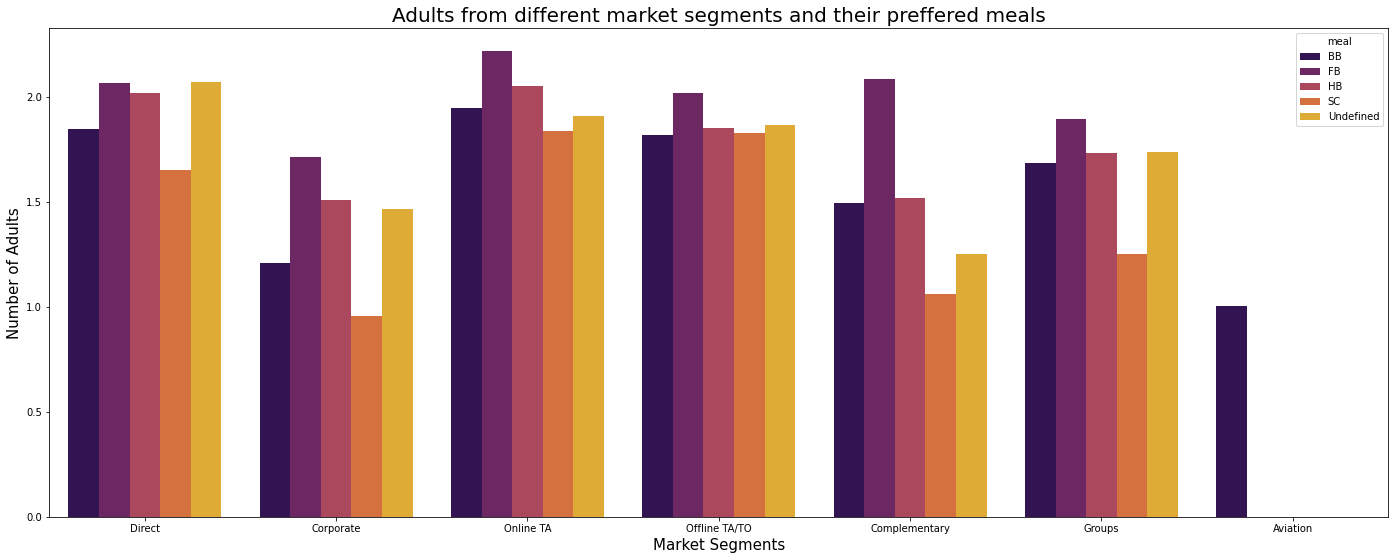

In [45]:
#using adults ,meal and market segment columns for solving this problem
plt.figure(figsize=(24,9))
sns.barplot(x='market_segment',y='adults',data=hoteldf,hue='meal',ci=0.01,palette='inferno')
plt.title('Adults from different market segments and their preffered meals', fontsize=20)
plt.xlabel('Market Segments',fontsize=15)
plt.ylabel('Number of Adults',fontsize=15)
plt.show()

## **Observation:** 
from the above graph we see that most of the people preferred FB(i.e. Full Board), which ultimately showcases the trustworthy and tasty meals offered by Hotels to their customers.

# **Lead time for each type of customer and the market segment they belong to**

This problem will tell us 2 things first classification of each type of customer into different market segments and their lead time

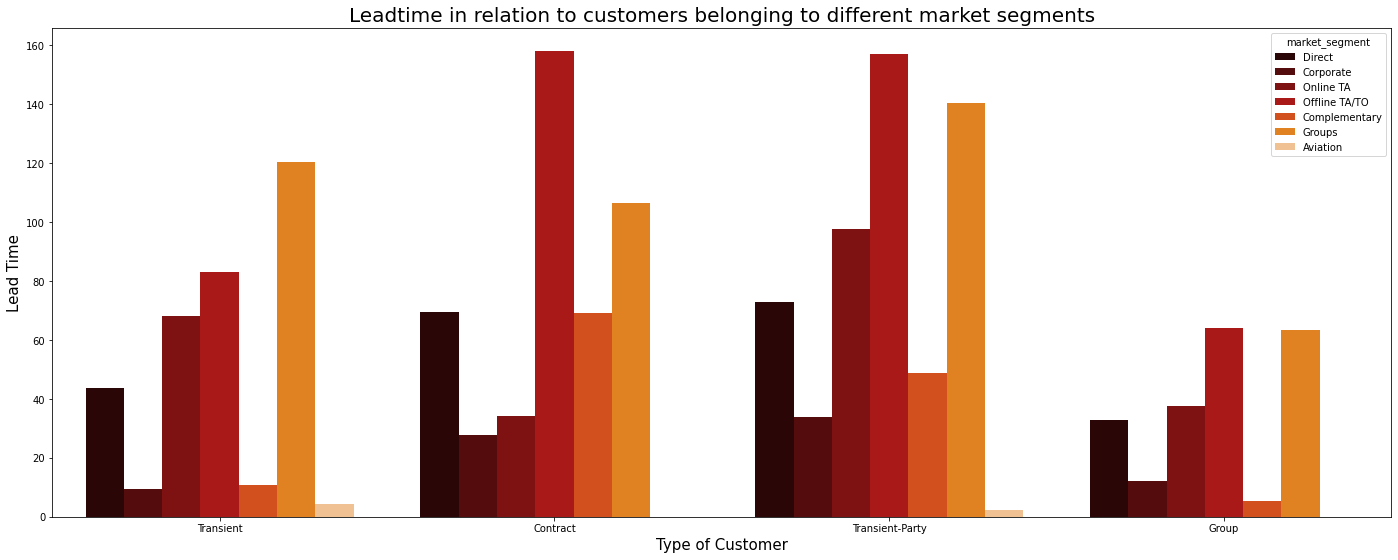

In [46]:
#displaying leadtime in relation to customers belonging to different market segments 
plt.figure(figsize=(24,9))
sns.barplot(x='customer_type',y='lead_time',data=hoteldf,hue='market_segment',ci=0.01,palette='gist_heat')
plt.title('Leadtime in relation to customers belonging to different market segments',fontsize=20)
plt.xlabel('Type of Customer',fontsize=15)
plt.ylabel('Lead Time',fontsize=15)
plt.show()

## **Observation**: 
Contracted and Transient-Party Customers generally book the hotels too early with respect to their actual arriving time which increases their lead time (lead time means the number of days between the time a customer books their room and the time they are scheduled to arrive at the hotel). Also, we see that the Customers belonging to the Aviation market mostly book tickets on time hence they've got the lowest lead time.

# **How many companies did their booking through agents?**

In [47]:
co_book_agents=hoteldf[(hoteldf['market_segment']=='Corporate') & (~hoteldf['agent'].isnull())]

In [48]:
co_book_agents['agent']=co_book_agents['agent'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
co_book_agents['agent']

3         304
363       167
1074      110
1517       88
2062      110
         ... 
115512    219
115513    219
115514    219
115524    219
115525    219
Name: agent, Length: 521, dtype: int64

In [50]:
co_book_agents['agent'].isnull().sum()

0

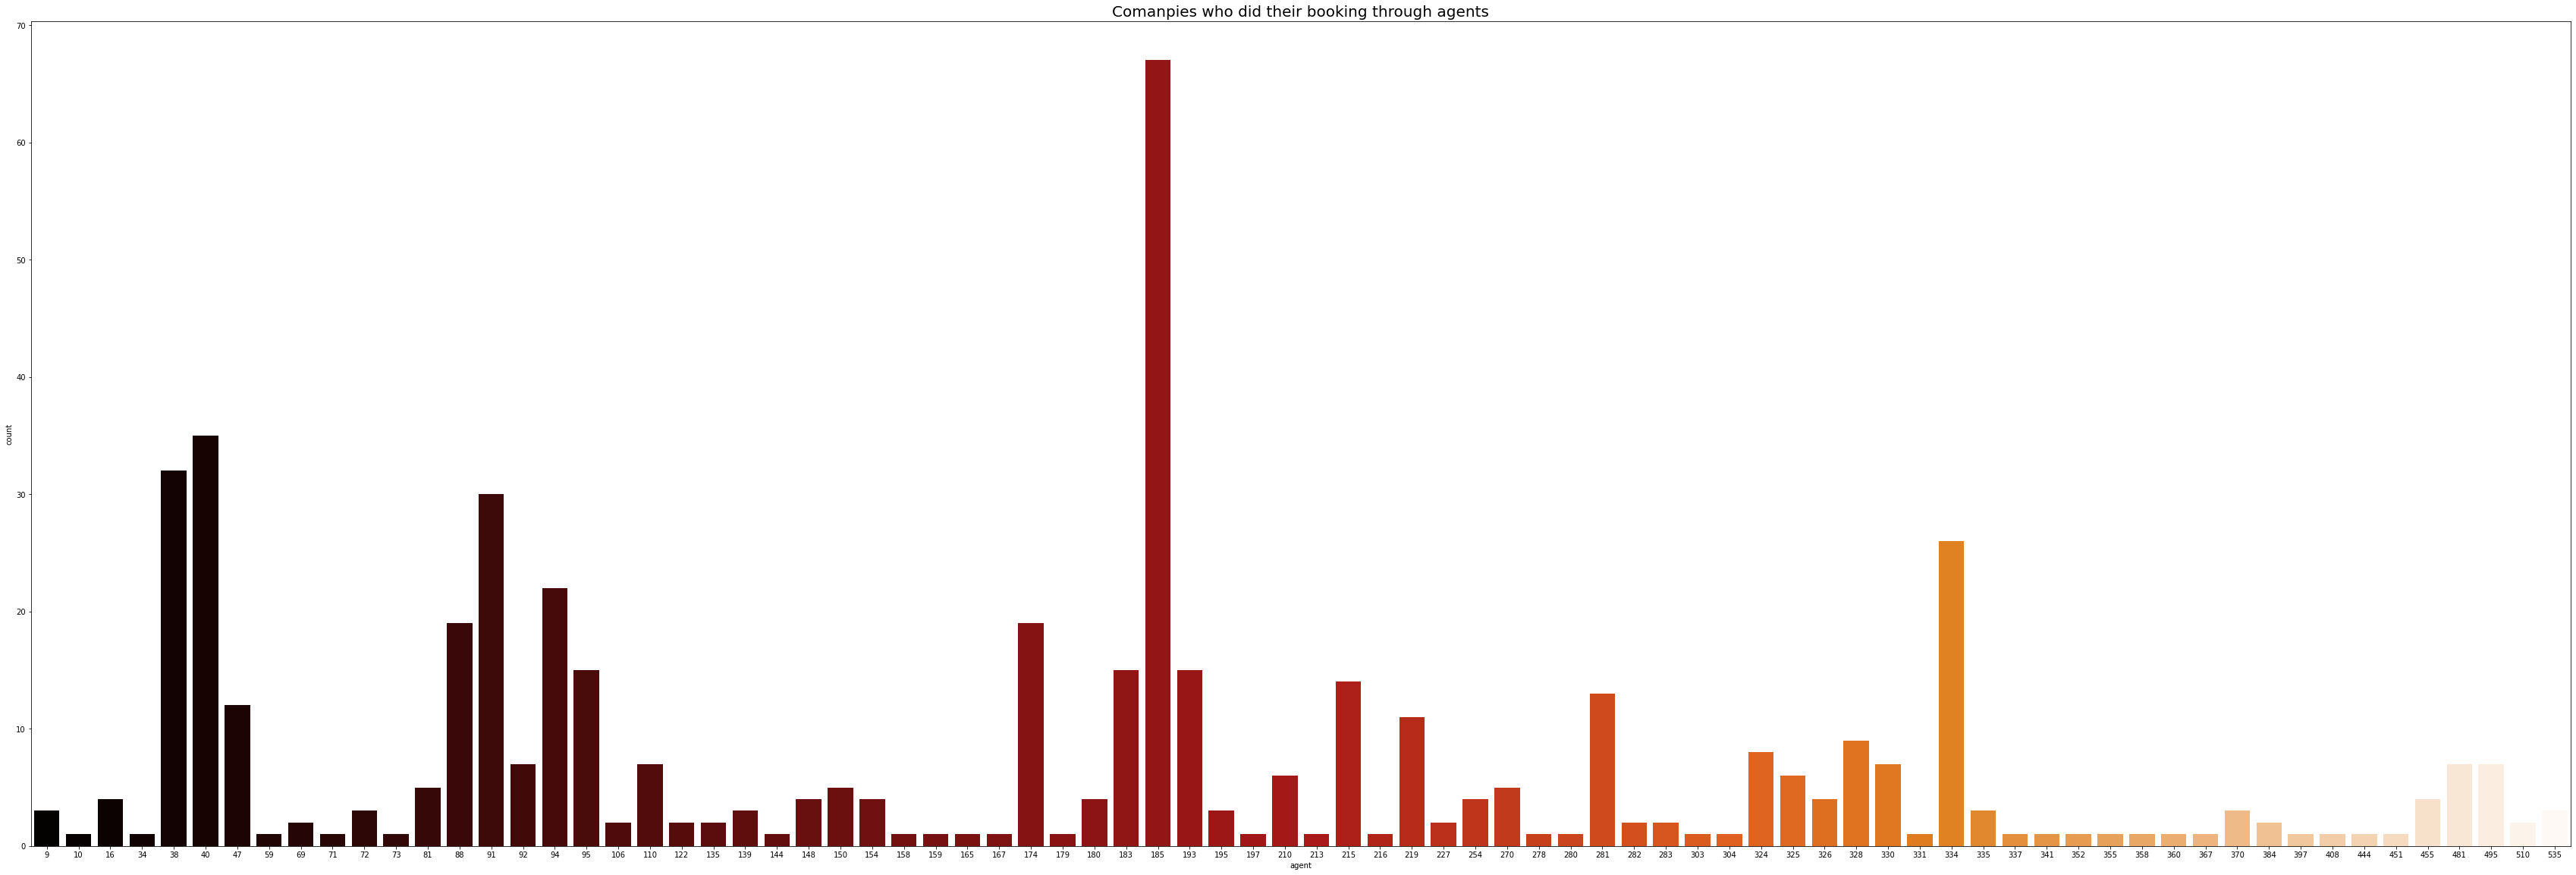

In [51]:
plt.figure(figsize=(60,20))
sns.countplot(x='agent',data=co_book_agents,palette='gist_heat')
plt.title('Comanpies who did their booking through agents',fontsize=20)
plt.show()

## **Observation:** 
It seems the Agent with ID 185 is the most useful agent who is boosting up the business of the Hotels by booking the most numbers of corporate trips in the Hotels.

# **How many agents did their booking through companies?**

In [52]:
ag_book_co=hoteldf[(hoteldf['distribution_channel']=='TA/TO')&(~hoteldf['company'].isnull())]

In [53]:
ag_book_co[['distribution_channel','company']].isnull().sum()

distribution_channel    0
company                 0
dtype: int64

In [54]:
ag_book_co[['distribution_channel','company']]

,distribution_channel,company
541,TA/TO,240.0
1970,TA/TO,240.0
2392,TA/TO,113.0
3961,TA/TO,371.0
10387,TA/TO,223.0
...,...,...
111431,TA/TO,148.0
112499,TA/TO,478.0
113046,TA/TO,148.0
113082,TA/TO,148.0


In [55]:
ag_book_co['company']=ag_book_co['company'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


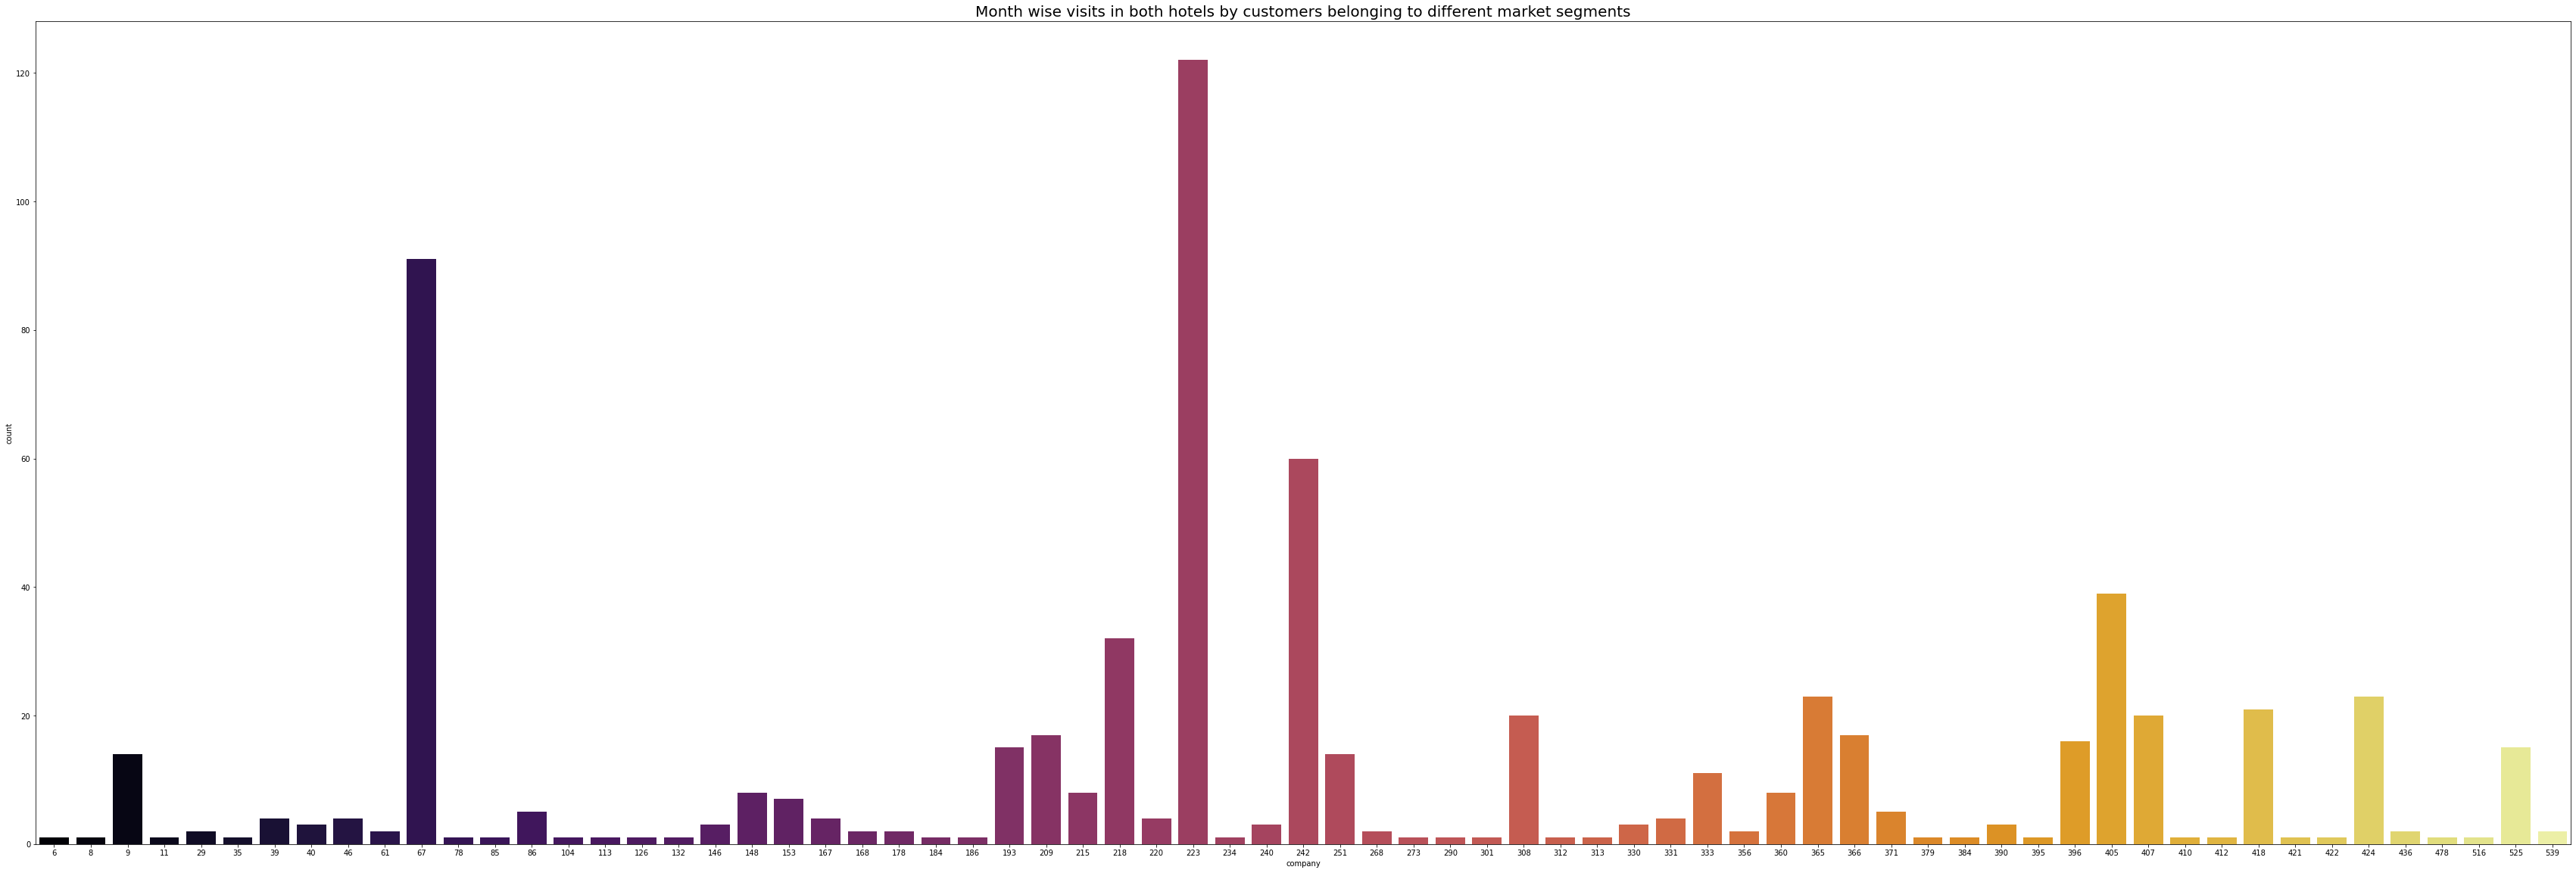

In [56]:
plt.figure(figsize=(60,20))
sns.countplot(x='company',data=ag_book_co,palette='inferno')
plt.title('Month wise visits in both hotels by customers belonging to different market segments',fontsize=20)
plt.show()

## **Observation:** 
The above barplot gives insights that the company having ID 223 has done the highest number of bookings for agents.

In [57]:
hoteldf['required_car_parking_spaces'].value_counts()

0    67435
1     7277
2       28
3        3
8        2
Name: required_car_parking_spaces, dtype: int64